image matrix size:  (400, 400)

 First 5 columns and rows of the image matrix: 
 [[166.1466 166.1466 164.1466 164.7178 164.5736]
 [167.5716 166.4274 165.4274 164.2832 164.2832]
 [166.7803 165.7803 164.7803 164.4236 164.4236]
 [167.1332 166.1332 164.989  163.989  164.5602]
 [166.0573 165.0573 163.9131 162.9131 163.5564]]


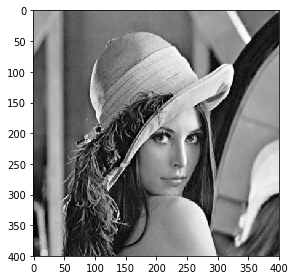

In [42]:
from skimage import io, viewer
from matplotlib import pyplot as plt
from PIL import Image

img = io.imread('Lenna.jpg', as_grey=True)  # load the image as grayscale
print('image matrix size: ', img.shape)      # print the size of image
print('\n First 5 columns and rows of the image matrix: \n', img[:5,:5]*255) 

io.imshow(img)
plt.show()

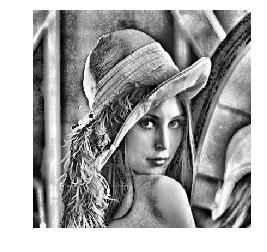


 First 5 columns and rows of the image_sharpen matrix: 
 [[497.0148 334.0124 324.4412 330.5856 329.3655]
 [338.5037 167.2111 167.4995 162.564  162.2091]
 [333.4164 164.7803 163.2812 164.6419 163.5716]
 [336.6952 167.7062 166.1294 163.0591 165.416 ]
 [334.0425 166.1294 164.6968 162.1977 164.2718]]


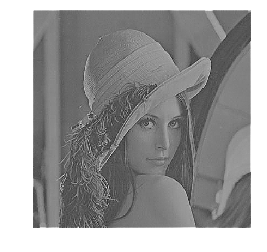

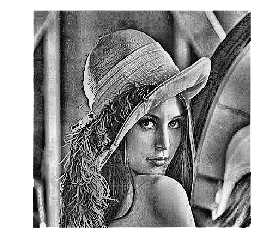

In [47]:
    from skimage import io, color
    import matplotlib.pyplot as plt
    import numpy as np
    from skimage import exposure
    import pylab
    def convolve2d(image, kernel):
        # This function which takes an image and a kernel 
        # and returns the convolution of them
        # Args:
        #   image: a numpy array of size [image_height, image_width].
        #   kernel: a numpy array of size [kernel_height, kernel_width].
        # Returns:
        #   a numpy array of size [image_height, image_width] (convolution output).
        
        kernel = np.flipud(np.fliplr(kernel))    # Flip the kernel
        output = np.zeros_like(image)            # convolution output
        # Add zero padding to the input image
        image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))   
        image_padded[1:-1, 1:-1] = image
        for x in range(image.shape[1]):     # Loop over every pixel of the image
            for y in range(image.shape[0]):
                # element-wise multiplication of the kernel and the image
                output[y,x]=(kernel*image_padded[y:y+3,x:x+3]).sum()        
        return output
    img = io.imread('Lenna.jpg')    # Load the image
    img = color.rgb2gray(img)       # Convert the image to grayscale (1 channel)
    # Adjust the contrast of the image by applying Histogram Equalization 
    image_equalized = exposure.equalize_adapthist(img/np.max(np.abs(img)), clip_limit=0.03)
    plt.imshow(image_equalized, cmap=plt.cm.gray)
    plt.axis('off')
    plt.show()
    # Convolve the sharpen kernel and the image
    kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
    image_sharpen = convolve2d(img,kernel)
    print('\n First 5 columns and rows of the image_sharpen matrix: \n', image_sharpen[:5,:5]*255)
    # Plot the filtered image
    plt.imshow(image_sharpen, cmap=plt.cm.gray)
    plt.axis('off')
    plt.show()
    # Adjust the contrast of the filtered image by applying Histogram Equalization 
    image_sharpen_equalized = exposure.equalize_adapthist(image_sharpen/np.max(np.abs(image_sharpen)), clip_limit=0.03)
    plt.imshow(image_sharpen_equalized, cmap=plt.cm.gray)
    plt.axis('off')
    plt.show()


 First 5 columns and rows of the image_sharpen matrix: 
 [[497.0148 334.0124 324.4412 330.5856 329.3655]
 [338.5037 167.2111 167.4995 162.564  162.2091]
 [333.4164 164.7803 163.2812 164.6419 163.5716]
 [336.6952 167.7062 166.1294 163.0591 165.416 ]
 [334.0425 166.1294 164.6968 162.1977 164.2718]]


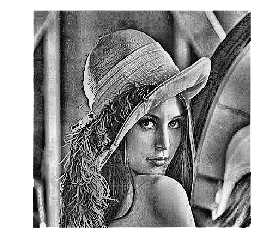

In [51]:
    import numpy as np
    import scipy
    from skimage import io, color
    from skimage import exposure
    import matplotlib.pyplot as plt
    img = io.imread('Lenna.jpg')    # Load the image
    img = color.rgb2gray(img)       # Convert the image to grayscale (1 channel)
    kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
    # you can use 'valid' instead of 'same', then it will not add zero padding
    
    print('\n First 5 columns and rows of the image_sharpen matrix: \n', image_sharpen[:5,:5]*255)
    # Adjust the contrast of the filtered image by applying Histogram Equalization 
    image_sharpen_equalized = exposure.equalize_adapthist(image_sharpen/np.max(np.abs(image_sharpen)), clip_limit=0.03)
    plt.imshow(image_sharpen_equalized, cmap=plt.cm.gray)
    plt.axis('off')
    plt.show()


 First 5 columns and rows of the img: 
 [[166.1466 166.1466 164.1466 164.7178 164.5736]
 [167.5716 166.4274 165.4274 164.2832 164.2832]
 [166.7803 165.7803 164.7803 164.4236 164.4236]
 [167.1332 166.1332 164.989  163.989  164.5602]
 [166.0573 165.0573 163.9131 162.9131 163.5564]]


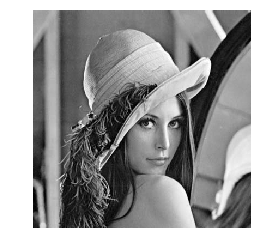


 First 5 columns and rows of the edges_equalized: 
 [[25.27742172 12.63871086 12.63871086 12.63871086 25.27742172]
 [12.63871086 12.63871086 12.63871086 12.63871086 12.63871086]
 [25.27742172 12.63871086 12.63871086 12.63871086 12.63871086]
 [25.27742172 12.63871086 12.63871086 12.63871086 25.27742172]
 [12.63871086 12.63871086 12.63871086 12.63871086 12.63871086]]


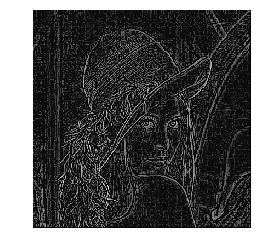

In [15]:
    import numpy as np
    import scipy.signal
    import matplotlib.pyplot as plt
    from skimage import io, color
    from skimage import exposure
    img = io.imread('Lenna.jpg')    # Load the image
    img = color.rgb2gray(img)       # Convert the image to grayscale (1 channel)
    kernel = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
    # we use 'valid' which means we do not add zero padding to our image
    edges = scipy.signal.convolve2d(img, kernel, 'valid')
    
    # Adjust the contrast of the filtered image by applying Histogram Equalization
    edges_equalized = exposure.equalize_adapthist(edges/np.max(np.abs(edges)), clip_limit=0.05)
    print('\n First 5 columns and rows of the img: \n', img[:5,:5]*255)
    plt.imshow(img, cmap=plt.cm.gray)
    plt.axis('off')
    plt.show()
    print('\n First 5 columns and rows of the edges_equalized: \n', edges_equalized[:5,:5]*255)
    plt.imshow(edges_equalized, cmap=plt.cm.gray)    # plot the edges_clipped
    plt.axis('off')
    plt.show()

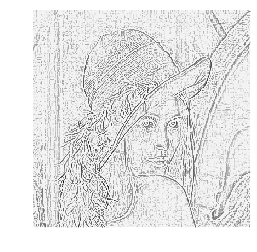

In [16]:
from skimage import util

inverted_img = util.invert(edges_equalized)

plt.imshow(inverted_img, cmap=plt.cm.gray)
plt.axis('off')
plt.show()